# Aufgabe 5

## Einlesen der Daten

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext


df = spark.read.option("header", "true").option("delimiter", "\t").csv("iw_customer.txt")

## Anzahl der Datensätze

In [2]:
df.count()

247065

## Ausgabe der ersten 5 Kunden

In [3]:
df.show(5)

+-----+----------+----------+---------+-------+--------+-----------+-------------+-------------+----------+--------------------+--------+------+-----------+
|owner|customerNo|salutation|firstname|surname|postcode|       city|       street|        eMail|newsletter|           birthdate|  riskID|credit|creditLimit|
+-----+----------+----------+---------+-------+--------+-----------+-------------+-------------+----------+--------------------+--------+------+-----------+
|   IW| KNR000001|      Frau|    Abcde|Hijklmn|   65232|Taunusstein|Opqrst-Street|mail@mail.com|         1|1968-01-07 00:00:...|69918055|   400|          1|
|   IW| KNR000002|      Frau|    Abcde|Hijklmn|   26904|     Börger|Opqrst-Street|mail@mail.com|         0|1978-10-10 00:00:...|92843675|  1000|          1|
|   IW| KNR000003|      Frau|    Abcde|Hijklmn|   78333|   Stockach|Opqrst-Street|mail@mail.com|         1|1967-04-29 00:00:...|11272894|     0|          2|
|   IW| KNR000011|      Frau|    Abcde|Hijklmn|   79618|Rh

## Entfernung der Attribute  'owner', 'firstname', 'lastname', 'street', 'eMail'


In [4]:
df = df.drop('owner','firstname','surname','street','eMail') # surname gemeint statt lastname aus Aufgabe?

In [5]:
df.show(5)

+----------+----------+--------+-----------+----------+--------------------+--------+------+-----------+
|customerNo|salutation|postcode|       city|newsletter|           birthdate|  riskID|credit|creditLimit|
+----------+----------+--------+-----------+----------+--------------------+--------+------+-----------+
| KNR000001|      Frau|   65232|Taunusstein|         1|1968-01-07 00:00:...|69918055|   400|          1|
| KNR000002|      Frau|   26904|     Börger|         0|1978-10-10 00:00:...|92843675|  1000|          1|
| KNR000003|      Frau|   78333|   Stockach|         1|1967-04-29 00:00:...|11272894|     0|          2|
| KNR000011|      Frau|   79618|Rheinfelden|         1|1974-10-21 00:00:...|86364865|   400|          1|
| KNR000020|      Frau|   64625|   Bensheim|         1|1969-03-23 00:00:...|79987284|   500|          1|
+----------+----------+--------+-----------+----------+--------------------+--------+------+-----------+
only showing top 5 rows



##  Entfernung aller Kunden, die vor 1900 geboren worden sind

In [6]:
df.createOrReplaceTempView("df")
df = spark.sql("SELECT * FROM df WHERE YEAR(birthdate) >= 1900")

df.show(5)

+----------+----------+--------+-----------+----------+--------------------+--------+------+-----------+
|customerNo|salutation|postcode|       city|newsletter|           birthdate|  riskID|credit|creditLimit|
+----------+----------+--------+-----------+----------+--------------------+--------+------+-----------+
| KNR000001|      Frau|   65232|Taunusstein|         1|1968-01-07 00:00:...|69918055|   400|          1|
| KNR000002|      Frau|   26904|     Börger|         0|1978-10-10 00:00:...|92843675|  1000|          1|
| KNR000003|      Frau|   78333|   Stockach|         1|1967-04-29 00:00:...|11272894|     0|          2|
| KNR000011|      Frau|   79618|Rheinfelden|         1|1974-10-21 00:00:...|86364865|   400|          1|
| KNR000020|      Frau|   64625|   Bensheim|         1|1969-03-23 00:00:...|79987284|   500|          1|
+----------+----------+--------+-----------+----------+--------------------+--------+------+-----------+
only showing top 5 rows



## Umbenennung des Attributs birthdate in birthyear und Anpassung der Daten

In [7]:
df = df.withColumnRenamed("birthdate", "birthyear")

df.createOrReplaceTempView("df")
df = spark.sql("SELECT customerNo, salutation, postcode, city, newsletter, YEAR(birthyear) as birthyear, riskId, credit, creditLimit FROM df")
df.show(5)

+----------+----------+--------+-----------+----------+---------+--------+------+-----------+
|customerNo|salutation|postcode|       city|newsletter|birthyear|  riskId|credit|creditLimit|
+----------+----------+--------+-----------+----------+---------+--------+------+-----------+
| KNR000001|      Frau|   65232|Taunusstein|         1|     1968|69918055|   400|          1|
| KNR000002|      Frau|   26904|     Börger|         0|     1978|92843675|  1000|          1|
| KNR000003|      Frau|   78333|   Stockach|         1|     1967|11272894|     0|          2|
| KNR000011|      Frau|   79618|Rheinfelden|         1|     1974|86364865|   400|          1|
| KNR000020|      Frau|   64625|   Bensheim|         1|     1969|79987284|   500|          1|
+----------+----------+--------+-----------+----------+---------+--------+------+-----------+
only showing top 5 rows



## Umbenennung der Spalte salutation und Anpassung der Daten je nach Inhalt

In [8]:
df = df.withColumnRenamed("salutation", "gender")
df.createOrReplaceTempView("df")
df = spark.sql("SELECT customerNo, CASE gender WHEN 'Frau' THEN 'weiblich' WHEN 'Herr' THEN 'männlich' END as gender, postcode, city, newsletter, birthyear, riskId, credit, creditLimit FROM df")

df.show(10)

+----------+--------+--------+--------------------+----------+---------+--------+------+-----------+
|customerNo|  gender|postcode|                city|newsletter|birthyear|  riskId|credit|creditLimit|
+----------+--------+--------+--------------------+----------+---------+--------+------+-----------+
| KNR000001|weiblich|   65232|         Taunusstein|         1|     1968|69918055|   400|          1|
| KNR000002|weiblich|   26904|              Börger|         0|     1978|92843675|  1000|          1|
| KNR000003|weiblich|   78333|            Stockach|         1|     1967|11272894|     0|          2|
| KNR000011|weiblich|   79618|         Rheinfelden|         1|     1974|86364865|   400|          1|
| KNR000020|weiblich|   64625|            Bensheim|         1|     1969|79987284|   500|          1|
| KNR000022|männlich|   45138|               Essen|         1|     1957|87651195|   400|          1|
| KNR000023|weiblich|   31812|         Bad Pyrmont|         1|     1967|87159767|   500|   

## Hinzufügen einer Spalte 'state' und joinen nach PLZ

In [9]:
from pyspark.sql.functions import col
#join 
plz_df = spark.read.option("header", "true").option("delimiter", "\t").csv("plz_mapping.txt")

df = df.join(plz_df, col('postcode') == col('PLZ'), 'leftouter').drop('kreis','Typ','PLZ')

df = df.withColumnRenamed("Bundesland", "state")

df.show(5)


+----------+--------+--------+-----------+----------+---------+--------+------+-----------+-----------------+
|customerNo|  gender|postcode|       city|newsletter|birthyear|  riskId|credit|creditLimit|            state|
+----------+--------+--------+-----------+----------+---------+--------+------+-----------+-----------------+
| KNR000001|weiblich|   65232|Taunusstein|         1|     1968|69918055|   400|          1|           Hessen|
| KNR000002|weiblich|   26904|     Börger|         0|     1978|92843675|  1000|          1|    Niedersachsen|
| KNR000003|weiblich|   78333|   Stockach|         1|     1967|11272894|     0|          2|Baden-Württemberg|
| KNR000011|weiblich|   79618|Rheinfelden|         1|     1974|86364865|   400|          1|Baden-Württemberg|
| KNR000020|weiblich|   64625|   Bensheim|         1|     1969|79987284|   500|          1|           Hessen|
+----------+--------+--------+-----------+----------+---------+--------+------+-----------+-----------------+
only showi

## Persistieren der Tabelle als 'customer'

In [10]:
df.createOrReplaceTempView("df")

#spark.sql("create table customer as select * from df"); #needs to be run on cluster

## Erstellung eines df mit eindeutigen Kunden anhand der riskId und Persistieren

In [18]:
from pyspark.sql.functions import collect_list

df.createOrReplaceTempView("df")

df_unique = df.dropDuplicates(subset=['riskId'])

df_unique.createOrReplaceTempView("df_unique")

df_unique.count()

#spark.sql("CREATE TABLE uniqueCustomers as SELECT * from df_unique") #needs to be run on cluster

107656

## Erstellung eines Kreisdiagramms über die Geschlechtsverteilung

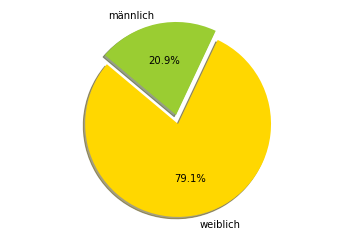

In [13]:
import matplotlib.pyplot as plt

df_unique.createOrReplaceTempView("df_unique")

female = spark.sql("SELECT COUNT(gender) FROM df_unique WHERE gender == 'weiblich'").first()[0]

male = spark.sql("SELECT COUNT(gender) FROM df_unique WHERE gender == 'männlich'").first()[0]

# Data to plot
labels = 'weiblich', 'männlich'
sizes = [female, male]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

##   Erstellung eines Balkendiagramm, dass die Verteilung der Kunden je Bundesland und je Geschlecht visualisiert. Die Verteilung ist absteigend sortiert nach Häufigkeit der  Kunden je Bundesland.


+-----+----+-----+--------------------+
|   ft|  mt|   at|          stateTotal|
+-----+----+-----+--------------------+
|18462|5181|23643| Nordrhein-Westfalen|
|16001|4055|20056|              Bayern|
|13195|3172|16367|   Baden-Württemberg|
| 8105|1850| 9955|              Hessen|
| 7731|1998| 9729|       Niedersachsen|
| 4211|1028| 5239|     Rheinland-Pfalz|
| 3076|1370| 4446|              Berlin|
| 3168| 754| 3922|  Schleswig-Holstein|
| 2795| 755| 3550|             Hamburg|
| 2285| 627| 2912|             Sachsen|
| 1311| 384| 1695|           Thüringen|
| 1223| 370| 1593|      Sachsen-Anhalt|
| 1140| 293| 1433|         Brandenburg|
| 1071| 268| 1339|Mecklenburg-Vorpo...|
|  604| 183|  787|              Bremen|
|  593| 154|  747|            Saarland|
+-----+----+-----+--------------------+



<Figure size 1920x1600 with 0 Axes>

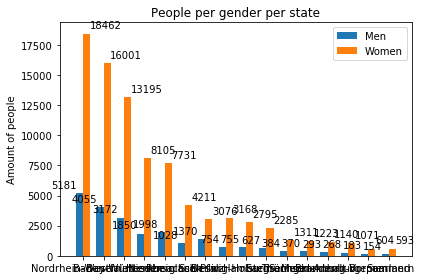

In [14]:
df_unique.createOrReplaceTempView("df_unique")

female_df = spark.sql("SELECT COUNT(customerNo) as ft, state as statef FROM df_unique WHERE gender == 'weiblich' GROUP BY state")

male_df = spark.sql("SELECT COUNT(customerNo) as mt, state as statem FROM df_unique WHERE gender == 'männlich' GROUP BY state")

total_df = spark.sql("SELECT COUNT(customerNo) as at, state as stateTotal FROM df_unique GROUP BY state")                    

complete_df = female_df.join(male_df, col('statef') == col('statem')).join(total_df, col('statef') == col('stateTotal')).drop('statef', 'statem').orderBy('at', ascending=False)
                    
complete_df.show()


import matplotlib
import matplotlib.pyplot as plt
import numpy as np


men_means = complete_df.select('mt').rdd.map(lambda r: r[0]).collect()
women_means = complete_df.select('ft').rdd.map(lambda r: r[0]).collect()

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig=plt.figure(figsize=(24, 20), dpi= 80)

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, men_means, width, label='Men')
rects2 = ax.bar(ind + width/2, women_means, width, label='Women')

ax.set_ylabel('Amount of people')
ax.set_title('People per gender per state')
ax.set_xticks(ind)
ax.set_xticklabels(complete_df.select('stateTotal').rdd.map(lambda r: r[0]).collect())
ax.legend()


def autolabel(rects, xpos='center'):
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()

plt.show()

## Einlesen der Umsätze und Retouren für weitere dispositive Fragestellungen

In [1]:
sales = spark.read.option("header", "true").option("delimiter", "\t").csv("iw_sales.txt")

sales.show(5)

returns = spark.read.option("header", "true").option("delimiter", "\t").csv("iw_return_header.txt")

returns.show(5)

NameError: name 'spark' is not defined

## Gruppierung der Umsätze des Jahres 2011 je Monat in einem Balkendiagramm

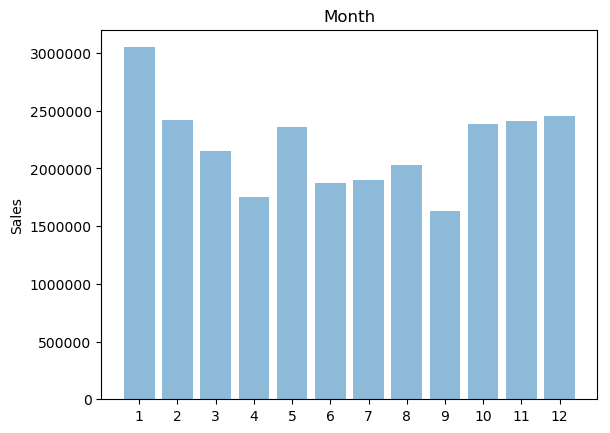

In [17]:
sales.createOrReplaceTempView("sales")

sales_df = spark.sql("SELECT MONTH(orderDate) as month, SUM(line_amount) as sales FROM sales WHERE YEAR(orderDate) == 2011 GROUP BY MONTH(orderDate) ORDER BY MONTH(orderDate)")

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = sales_df.select('month').rdd.map(lambda r: r[0]).collect()
y_pos = np.arange(len(objects))
performance = sales_df.select('sales').rdd.map(lambda r: r[0]).collect()

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Sales')
plt.title('Month')

plt.show()

## Bestellungen eines eindeutigen Kunden im Durchschnitt

In [48]:
sales.createOrReplaceTempView("avg")

count_per_customerNo = spark.sql("SELECT COUNT(orderNo) as cOrder, customerNo as cNo FROM avg GROUP BY customerNo")


df_with_count = df.join(count_per_customerNo, col('df.customerNo') == col('cNo')).drop('cNo')

df_with_count.createOrReplaceTempView("df_with_count")

spark.sql("SELECT AVG(sum) as AvgOrderPerUniqueCustomer FROM (SELECT SUM(cOrder) as sum FROM df_with_count GROUP BY riskId)").show()

+-------------------------+
|AvgOrderPerUniqueCustomer|
+-------------------------+
|       7.6018521958831835|
+-------------------------+



## Durchschnittliche Anzahl an Bestellpositionen und der durchschnittliche Gesamtbetrag einer Bestellung


In [47]:
sales.createOrReplaceTempView("avg")

spark.sql("SELECT AVG(positions) as DurchschnittsPositionenanzahl, AVG(total) as Durchschnittsgesamtbetrag FROM (SELECT orderNo, COUNT(orderNo) as positions, SUM(line_amount) as total FROM avg GROUP BY orderNo)").show(10)

+-----------------------------+-------------------------+
|DurchschnittsPositionenanzahl|Durchschnittsgesamtbetrag|
+-----------------------------+-------------------------+
|           3.2991338274829407|       187.81201589662416|
+-----------------------------+-------------------------+



## Die Anzahl der Bestellpositionen und die Anzahl der retournierten Positionen je Bundesland und Retourenquote je Bundesland und insgesamt


In [102]:
order_with_customer_and_returns = sales.join(df, ['customerNo'], 'left').join(returns.withColumnRenamed("orderNo", "orderNor"), ['customerNo'], 'left').drop('orderNor')

order_with_customer_and_returns.createOrReplaceTempView("owcar")

order_and_return_counts = spark.sql("SELECT COUNT(orderNo) as AnzahlBestellpositionen, COUNT(returnNo) as AnzahlRetourniertePositionen, state FROM owcar GROUP BY state")

order_and_return_counts.show()

order_and_return_counts.createOrReplaceTempView("oarc")

spark.sql("SELECT ROUND(AnzahlRetourniertePositionen / AnzahlBestellpositionen, 2) AS ReturnRate, state FROM oarc").show()

spark.sql("SELECT ROUND(SUM(AnzahlRetourniertePositionen) / SUM(AnzahlBestellpositionen), 2) * 100 as TotalReturnRateInPercent FROM oarc").show()

+-----------------------+----------------------------+--------------------+
|AnzahlBestellpositionen|AnzahlRetourniertePositionen|               state|
+-----------------------+----------------------------+--------------------+
|                  14435|                       10013|      Sachsen-Anhalt|
|                  78069|                       52079|       Niedersachsen|
|                  12190|                        8084|         Brandenburg|
|                  26903|                       16448|              Berlin|
|                   1530|                         926|                null|
|                 169212|                      114297|              Bayern|
|                  27206|                       18972|             Sachsen|
|                  22745|                       13589|             Hamburg|
|                   5093|                        2961|              Bremen|
|                 177997|                      113655| Nordrhein-Westfalen|
|           